# ML T-Generation Занятие 3: Линейная регрессия.
# Проблема переобучения. Кросс-валидация и регуляризация.

Авторы: Гаркавый Андрей (andrewgarkavyy@gmail.com), Кирилл Васильев (kirivasile@yandex.ru)


## 0. План

1. Приближение одномерной функции многочленом

2. Переобучение

3. Выводы

4. Разделение на тренировочную и тестовую части

5. Кросс-валидация

6. Линейная регрессия

7. Как подбираются коэффициенты

8. Регуляризация

## 1. Приближение одномерной функции многочленом

Начнем с простой задачи.


1) Есть функция $f(x)$, но мы ее не знаем.

2) Зато мы знаем ее значения в $m$ точках (они называются тренировочным множеством):
$$f(x_1) = y_1$$
$$\cdots$$
$$f(x_m) = y_m$$
3) Нужно научиться приблизительно восстанавливать эту функцию.

Самый простой способ - научиться приближать её многочленом, а именно давайте подберем такие коэффициенты $a_0, a_1, \ldots, a_n$, чтобы многочлен $P(x) = a_0 + a_1x + a_2x^2 + \ldots + a_nx^n$ был как можно ближе к $f(x)$.

Но что такое "приблизить"? Мы знаем лишь значения в $m$ точках, так что в лучшем случае она должна проходить через все эти точки (хотя скоро мы увидим, что это не так).

В этом случае обычно пытаются минимизировать сумму квадратов ошибок во всех точках, то есть **функцию потерь** $$L(P) = \sum_i (P(x_i) - f(x_i))^2 $$

Эту величину называют **MSE** - Mean Squared Error (средняя квадратичная ошибка).

Тут может возникнуть вопрос, почему мы берем именно сумму квадратов, а не, например, сумму модулей. Однозначного ответа на этот вопрос нет, наиболее удачный ответ, пожалуй такой: у суммы квадратов есть много удобных свойств, например это выпуклая, дифференцируемая функция. Тем не менее иногда другой выбор может быть оправданным. Если вам интересно чуть больше понять про смысл этих условий, можете решить такие задачи:

**(0.5 балла) Доп. Задача 1.** Найдите число m такое, что для заданных $x_i$ сумма $\sum|m - x_i|$ минимальна

<Место для решения>

**(0.5 балла) Доп. Задача 2.** Найдите число m такое, что для заданных $x_i$ сумма $\sum(m - x_i)^2$ минимальна


<место для решения>

Сейчас можно их и пропустить.


В питоне есть пакет scipy, в котором как раз есть решение этой задаче - подбор такого многочлена для заданных точек, что среднеквадратичная ошибка минимальна.

Чтобы им пользоваться, вам нужно ввести в консоли Анаконды `conda install scipy`. Или, если вы настроили pip `pip install scipy`

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

In /home/pavel/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pavel/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pavel/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/pavel/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/pavel/anaconda3/lib/python3.7/site-packages/matplotlib/

Сначала просто нарисуем какой-нибудь многочлен, например $f(x) = 3x^3 - 2x^2 + x$ на отрезке $[-1, 1]$:

In [2]:
def f(x):
    return 3 * x ** 3 - 2 * x**2 + x

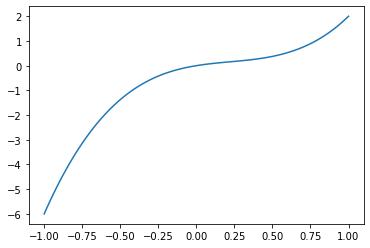

In [3]:
x100 = np.linspace(-1, 1, 100)
plt.plot(x100, f(x100))

Теперь зададим набор точек (10 штук) и посмотрим что будет, если подобрать по ним коэффициенты нашего многочлена:

In [4]:
x = np.linspace(-1, 1, 10)  # 10 точек на отрезке [-1, 1]
y = f(x)
coefs = np.polyfit(x, y, deg = 2)
coefs

array([-2.00000000e+00,  3.17037037e+00, -3.93270787e-16])

(это означает многочлен $-2x^2 + 3.17037 x$)

scipy позволяет легко работать с многочленами, заданными их коэффициентами. Мы можем создать из них объект poly1d, который можно будет просто вызывать для получения нужных значений:

In [5]:
poly = np.poly1d(coefs)
poly(0), poly(1), poly(2)

(-3.93270786911128e-16, 1.1703703703703716, -1.659259259259255)

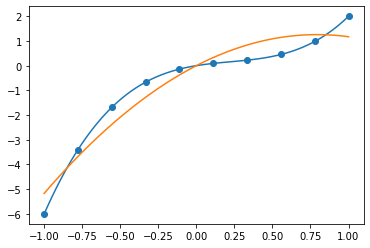

In [6]:
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))

Довольно ожидаемо, наша функция (оранжевая) не очень похожа на то, что мы искали (синяя). Наверное зря мы пытаемся приблизить кубическую функцию многочленом второй степени. Давайте попробуем 3-ю степень.

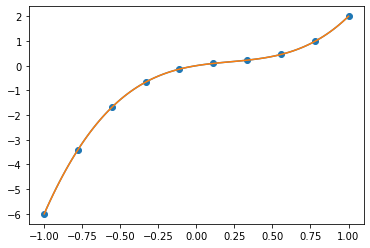

In [7]:
coefs = np.polyfit(x, y, deg = 3)
poly = np.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))

На этот раз мы в точности угадали функцию. Можете проверить, что если увеличивать степень многочлена, результат не меняется: более высокие степени тут просто не нужны.

Но мы сейчас жили в идеальном мире. На практике чаще всего известные нам значения не совсем точны. Давайте добавим к значениям нашей функции немного шума:

In [8]:
x = np.linspace(-1, 1, 10)
y = f(x) + np.random.normal(0, 0.5, 10)  # случайный шум

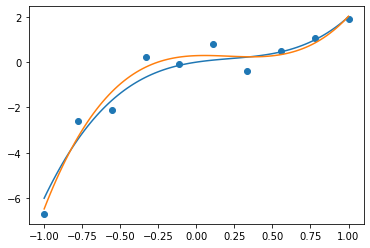

In [9]:
coefs = np.polyfit(x, y, deg = 3)
poly = np.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))

Теперь мы почти попали. Перед тем как читать дальше, подумайте над заданием.

**(1 балл) Обязательное задание 1:** попробуйте увеличить степень полинома. Что произойдет с графиком нашего приближения? Посмотрите  как обе функции себя ведут вне интервала x. Попробуйте сформулировать проблему, с которой мы столкнулись.

/home/pavel/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


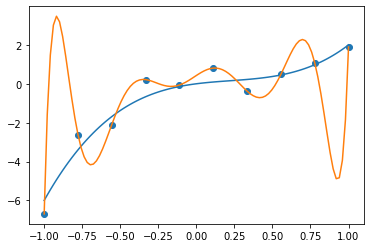

In [10]:
coefs = np.polyfit(x, y, deg = 10)
poly = np.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x100, f(x100))
plt.plot(x100, poly(x100))

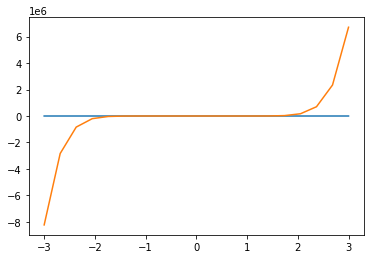

In [11]:
x200 = np.linspace(-3, 3, 20)
 
plt.plot(x200, f(x200))
plt.plot(x200, poly(x200))

Оранжевый график, который мы обучилили на отрезке [-1, 1] со степенью = 10, не понятно, что вообще делает на отрезеке от [-3, 3], то он параболу парадирует, то что-то похожее на многочлен степени 3, каждый раз разное, при перезапуске ячейки с приближением, но если при приближении использовать полином 3 степени, то на отрезке [-3,3] многочлен хорошо работает, что продемонстрировано на двух нижних ячейках 

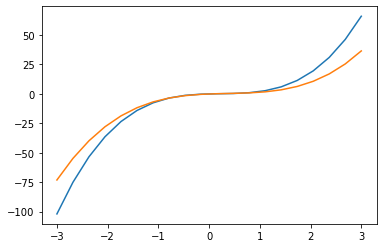

In [12]:
x1 = np.linspace(-1, 1, 10)
y1 = f(x1) + np.random.normal(0, 0.5, 10)
coefs = np.polyfit(x1, y1, deg = 3)
poly = np.poly1d(coefs)
#Обучили на [-1, 1] deg = 3

#Создаем выборку [-3,3] для теста
x200 = np.linspace(-3, 3, 20)
plt.plot(x200, f(x200))
plt.plot(x200, poly(x200))


## 2. Переобучение

То, что вы увидели при решении этого задания называется в машинном обучении **переобучением** (overfittig).

Если мы используем достаточно сложную модель (то есть модель, у которой много параметров, в нашем случае -- многочлен достаточно высокой степени), то у модели появляется возможность "выучить" все точки, которые она видела. Например, если задано $m$ точек, всегда можно подобрать многочлен степени $m-1$, который через них проходит (если вы не знакомы с этим фактом, можете подумать, как его доказать).


"Честный" способ проверять качество нашей апроксимации -- **смотреть точность в точках, которые мы не использовали при подборе многочлена**. Это множество часто называют тестовым множеством. Давайте зададим его так:

In [13]:
# возьмем 10 случайных точек от 0 до 1
x_test = np.random.random(10) 

# превратим их в 10 случайных точек от -1 до 1
x_test = 2 * x_test - 1
x_test

array([ 0.72888349, -0.43270694,  0.54167414, -0.73972421,  0.83446192,
       -0.90934294, -0.14043263,  0.88700734,  0.6478656 , -0.56112126])

**(1 балл)  Обязательное задание 2:** напишите функцию, которая для данного многочлена считает его качество на тестовом множестве (то есть среднеквадратичное отклонение между значениями функции $f$ и многочлена $P$ на тестовой выборке).

Вы все прошлое занятие изучали разные функции, попробуйте сделать MSE как можно более компактной функцией (желательно в одну строчку).

In [14]:
# y_real - это np.array c реальными значениями в точках
# y_pred - это np.array c предсказанными нами значениями в точках
# они одной длины
def MSE(y_real, y_pred):
    return (np.sum((y_real-y_pred)**2))/len(y_real)
    

**(1 балл) Обязательное задание 3:** нарисуйте график зависимости ошибки на тестовом множестве от степени многочлена. При какой степени ошибка минимальна?


[233.01453280430025,
 202.09195297875118,
 7.600193144156535,
 7.621771874678049,
 8.437292699680118,
 11.630580663753435,
 11.882402943859132,
 14.269825027622772,
 16.29149894318493,
 16.4508174860966]

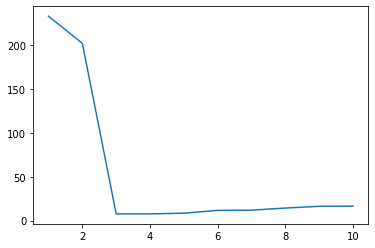

In [15]:
mses = []
degs = np.arange(1,11)
x200 = np.linspace(-3, 3, 20)

x = np.linspace(-3, 3, 20)
y = f(x) + np.random.normal(-3, 7.5, 20)
for i in degs:
    coefs = np.polyfit(x, y, deg = i)
    poly = np.poly1d(coefs)
    mses.append(MSE(f(x200),poly(x200)))

plt.plot(degs, mses)
mses
#При deg= 3

**(1 балл) Доп. задача 5:** как меняется график, если увеличивать количество точек в множестве, на котором мы подбираем многочлен?

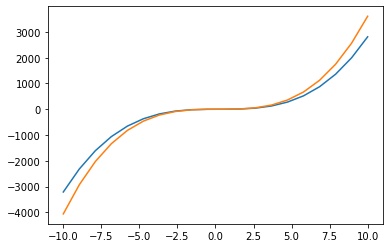

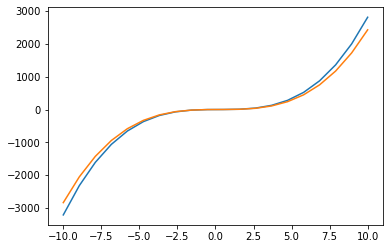

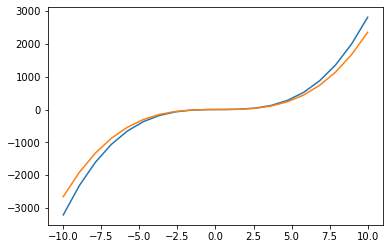

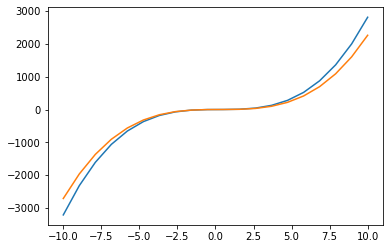

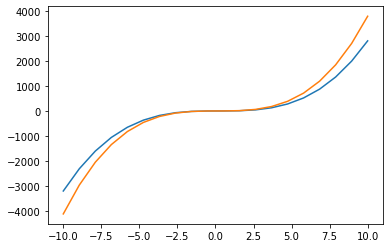

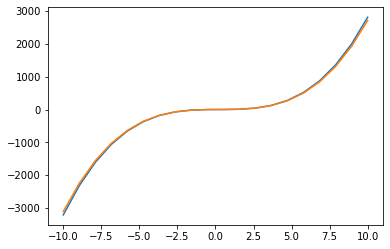

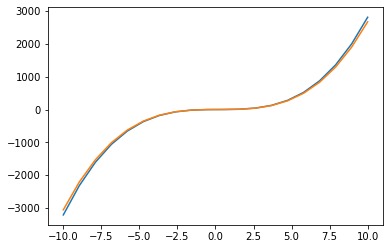

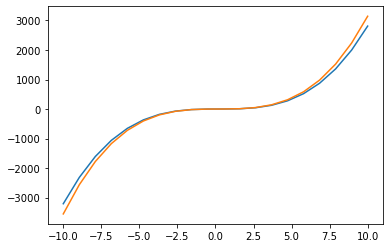

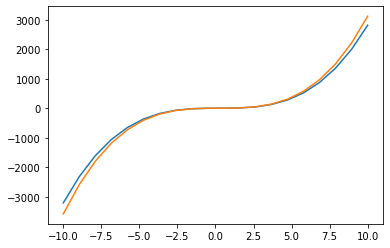

In [16]:
# место для решения
x200 = np.linspace(-10, 10, 20)


 

for i in [2,3,4,5,6,7,8,9,10]:
    x1 = np.linspace(-1, 1, i*10)
    y1 = f(x1) + np.random.normal(0, 0.5, i*10)
    coefs = np.polyfit(x1, y1, deg = 3)
    poly = np.poly1d(coefs)
    
    
    plt.figure(i+1) #to let the index start at 1
    plt.plot(x200, f(x200))
    plt.plot(x200, poly(x200))
plt.show()

## 3. Выводы

1) Цель машинного обучения с учителем - приблизить **целевую функцию** (target) по её значениям (возможно приблзительным) в некоторых точках.

В нашем случае - это $f(x) = 3x^3 - 2x^2 + x$. Обычно она, конечно, никому неизвестна.

2) Множество точек с известным значением функции называется **тренировочным множеством** (train).

В нашем случае - это 10 точек, выбранных равномерно на отрезке $[-1, 1]$.

3) Чтобы приблизить функцию, нужно использовать какую-то **модель** (model), приближающую функцию.

В данном случае - это многочлен $P(x) = a_0 + a_1x + a_2x^2 + \ldots + a_nx^n$.

4) Мы выбираем **функцию потерь** (loss function) для сравнения результатов модели и реальных значения на тренировочном множестве. Чем она меньше, тем лучше наша модель.

В данном случае - это $MSE = \sum_i (P(x_i) - f(x_i))^2$.

5) У модели есть **параметры**, которые мы выбираем так, чтобы функция потерь на тренировочном множестве была минимальна.

В данном случае - это коэффициенты многочлена ($a_0, a_1, \ldots, a_n$). Выбираются они с помощью пока магической для нас функции polyfit.

6) У модели есть **гиперпараметры**, которые мы выбираем сами.

В данном случае - это степень многочлена (число $n$).

7) Однако такой подход с минимизацией функции потерь может привести к тому, что мы идеально приблизим функцию на тренировочном множестве, но она будет абсолютно отличаться во всех остальных точках. Это явление называется **переобучением**.

В данном случае - мы видели, что если степень многочлена большая (больше трех), то мы попадаем во все точки, но при этом сам многочлен сильно отличается от $f(x)$.

8) Чтобы бороться с переобучением, полезно выделить **тестовое множество** точек, в которых мы тоже знаем результаты функции. Оно никак не используется при обучении модели, и нужно только для валидации результата.

В данном случае - мы взяли рандомные 10 точек на отрезке $[-1, 1]$.

9) В идеальном случае функция потерь на тренировочном и тестовом множестве не отличается. А вот если на тренировочном функция потерь получается гораздо меньше, чем на тестовом, то это говорит о том, что происходит переобучение.

Действительно, при большой степени MSE близка к или равна нулю на тренировочном множестве, а на тестовом множестве нет.

10) Единственный пока способ, который мы знаем, чтобы влиять на переобучение - это перебирать **гиперпараметры** модели так, чтобы **минимизировать функцию потерь на тестовом множестве**.

Действительно, если выбрать степень 3, то функция потерь окажется минимальной на тестовом множестве, как мы видели в задании 3.

## 4. Разделение на тренировочную и тестовую части

Если вы решите поучаствовать в каком-нибудь соревновании по машинному обучению, вы увидите, что тестовое множество вам недоступно (иначе было бы неинтересно: очень легко обучиться предсказывать то, что ты уже видел).

В реальной жизни обычно тоже считают, что на тестовом множестве можно провериться один раз -- в самом конце. Иначе вы начнете подкручивать гиперпараметры глядя на результат на тестовой выборке и, сами того не замечая, переобучитесь.

Как поступать в такой ситуации? Придется пожертвовать частью точек, которые даны нам для обучения и использовать их для подбора гиперпараметров в нашем алгоритме (в нашем случае это степень многочлена).

То есть придется из точек, у которых мы знаем результаты, убрать, например, 10% в тестовое множество.

Функция для этого есть, например, в пакете sklearn, который можно скачать так: `pip install scikit-learn` (`conda install scikit-learn`)

In [17]:
X = np.linspace(-1, 1, 50)
y = f(X)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [19]:
X_train, y_train

(array([-0.67346939, -0.10204082,  0.2244898 ,  0.71428571,  0.63265306,
        -0.95918367, -0.63265306,  0.91836735, -1.        , -0.46938776,
         0.34693878, -0.18367347,  0.10204082,  0.42857143, -0.75510204,
         1.        , -0.79591837, -0.30612245, -0.3877551 , -0.14285714,
         0.18367347, -0.51020408,  0.02040816, -0.06122449, -0.26530612,
         0.83673469,  0.79591837,  0.3877551 , -0.59183673,  0.59183673,
         0.46938776, -0.42857143,  0.14285714, -0.55102041, -0.83673469,
        -0.2244898 ,  0.75510204, -0.91836735, -0.71428571,  0.26530612,
         0.51020408,  0.95918367,  0.55102041, -0.34693878,  0.67346939]),
 array([-2.4969698 , -0.12605292,  0.1576384 ,  0.78717201,  0.59181124,
        -5.44669313, -2.19281082,  1.55521934, -6.        , -1.22029087,
         0.23148518, -0.26973455,  0.08440361,  0.29737609, -3.18709041,
         2.        , -3.5755    , -0.57960544, -0.86336475, -0.19241983,
         0.13479078, -1.42925142,  0.01960068, -0

In [20]:
X_test, y_test

(array([ 0.06122449,  0.30612245,  0.87755102, -0.87755102, -0.02040816]),
 array([ 0.0544161 ,  0.20476162,  1.36475448, -4.44513766, -0.02126665]))

## 5. Кросс-валидация

Также есть более точный способ проводить валидацию результата. Если разделить множество один раз на тестовое и тренировочное, то это может значительно влиять на результат. Вдруг в тестовое множество случайно попали такие точки, в которых предсказать значение тяжелее или легче, чем обычно?

Тогда можно применить **кросс-валидацию** - давайте разделим множество на 10 примерно равных частей, тогда у нас есть 10 разделений на тренировочное и тестовое множество - как тестовое множество выберем по очереди каждую из этих частей, а как тренировочное выберем все остальные части. В итоге, все элементы множества побывают и в тренировочной, и в тестовой чати.

Можно посчитать результат на каждом из 10 разбиений и просто усреднить результат.


In [21]:
# Есть вот такая удобная штука
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    print(test_index, train_index)

[0 1 2 3 4] [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[5 6 7 8 9] [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[10 11 12 13 14] [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[15 16 17 18 19] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[20 21 22 23 24] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[25 26 27 28 29] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[30 31 32 33 34] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

**(1 балл) Доп. задача 6:** проделайте все вышеописанное с функцией $f(x) = \frac{1}{1 + e^{-x}}$ на отрезке $[-3, 3]$. Как оптимальная степень зависит от количества точек, по которым вы подбираете многочлен?

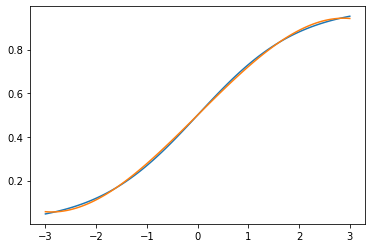

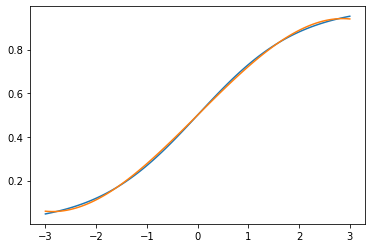

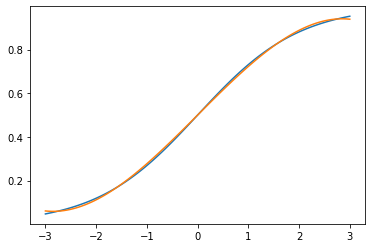

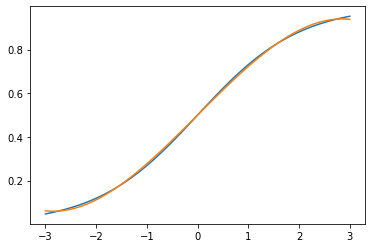

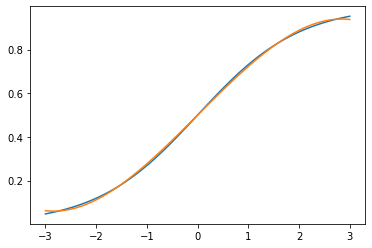

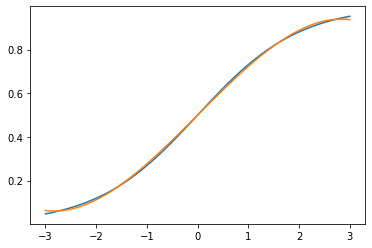

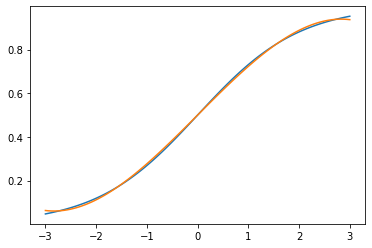

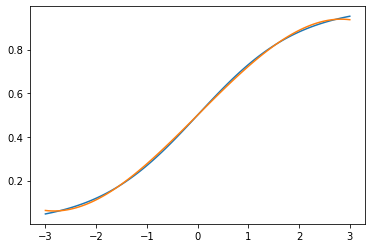

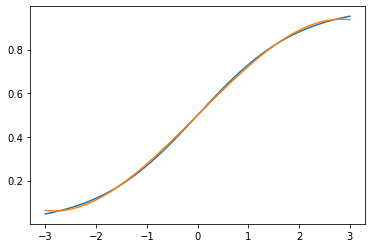

In [22]:
from math import exp
# место для решения
def f(x):
    return 1/(1+np.exp(-x))
# место для решения

 
x100 = np.linspace(-3, 3, 100)
 

for i in [2,3,4,5,6,7,8,9,10]:
    x1 = np.linspace(-3, 3, i*10)
    y1 = f(x1)
    coefs = np.polyfit(x1, y1, deg = 3)
    poly = np.poly1d(coefs)
    
    
    plt.figure(i+1) 
    plt.plot(x100, f(x100))
    plt.plot(x100, poly(x100))
plt.show()

#### 6. Линейная регрессия

**Регрессией** называется задача машинного обучения с учителем, в которой у нас есть много объектов с признаками, у которых надо научиться приближенно предсказывать значение целевой функции, которая равна какому-то **действительному числу**. 

В этом будет отличие задачи регрессии от задачи классификации - регрессия предсказывает число, а классификация - один из нескольких классов.

До этого мы учились приближать одномерную функцию многочленом. Каждая точка имела ровно один признак - коодинату $x$.

Тем не менее, чаще всего в машинном обучении признаков гораздо больше. Возьмем какой-нибудь реальный датасет.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


В датасете показаны результаты продаж разных товаров в зависимости от ресурсов (тысяч долларов), которые вложили в различные средства распространения информации:
* TV - реклама по телевизору
* radio - на радио
* newspapers - в газетах

Целевая переменная:

sales - продажи такого-то товара (тысячи штук)

In [24]:
# Размеры датасета
data.shape

(200, 4)

Признаков немного, поэтому давайте попробуем визуализиовать зависимость целевой переменной от каждого из признаков.

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

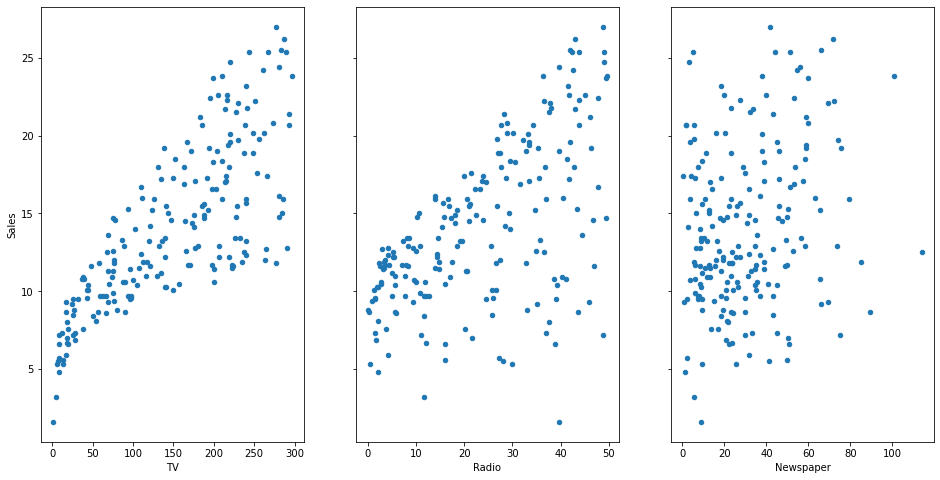

In [25]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

### Простая линейная регрессия

Из графиков выше предположим, что только размер рекламы на телевизоре влияет на продажи больше всего. Формула для такого случая выглядит следующим образом:
$$y=\beta_0+\beta_1x$$
Здесь:
* $y$ - наше предсказание продаж
* $x$ - сколько денег вложили в рекламу по телевидению
* $\beta_0$ - сдвиг
* $\beta_1$ - параметр, отвечающий за важность признака x

$\beta_0$ и $\beta_1$ - это параметры нашей модели. Чтобы создать хорошую модель, надо "обучить" эти значения. Т.е. изменить их так, чтобы они хорошо работали для нашей задачи.

### Обучение коэффициентов модели

Параметры $\beta_0$ и $\beta_1$ подбираются таким образом, чтобы минимизировать **сумму наименьших квадратов ошибок**:

$$L(MSE)=\sum_{i=1}^{N}(y^{true}_i-y^{pred}_i)^2$$

<img src="mse_plot.png">

* Чёрные точки на даграмме $y^{true}$ - это полученные истинные значения x и y .
* Синяя линия $y^{pred}$ - это наша модель: линия, которой мы стараемся приблизить данные .
* Красные отрезки - это ошибки нашей модели.


Как коэффициенты $\beta_0$ и $\beta_1$ соотносятся с синей линией:
* $\beta_0$ - это сдвиг нашей прямой, т.е. значение y при x = 0.
* $\beta_1$ - это тангенс угла наклона прямой.

Как искать данные коэффициенты? Есть много техник: аналитическое решение, методы основанные на градиентном спуске. Пока же достаточно знать, что многие библиотеки (в том числе и sklearn) умеют это делать. Зачем кожаному мешку напрягаться :)

In [26]:
from sklearn.linear_model import LinearRegression

# Наша модель
reg = LinearRegression()

# Подготовим данные для неё
# На вход требуется 2D матрица, а у нас только один признак,
# и надо превратить его из 1D вектора (n,) в 2D матрицу (n, 1).
# Это можно сделать с помощью метода reshape
x = data["TV"].values.reshape(-1, 1) 
y = data["Sales"].values

# Обучаем нашу модель
reg.fit(x, y)

# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
print("Массив коэффициентов={}".format(reg.coef_))

Сдвиг=7.032593549127693
Массив коэффициентов=[0.04753664]


### Интерпретируем коэффициенты
Что означает коэффициент, связанный с телевидением ($\beta_1$)?
* Дополнительные 1000$, вложенные на в рекламу на телевидении, позволят продажам товара вырасти где-то на 0.047 * 1000 = 47 тысяч единиц.

In [27]:
# Посчитаем ручками
7.032594 + 0.047537*50

9.409444

In [28]:
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [29]:
reg.predict(X_new)

array([9.40942557])

### Нарисуем нашу прямую

In [30]:
# Возьмём предсказания для данных, на которых обучались
y_pred = reg.predict(x)
y_pred.shape

(200,)

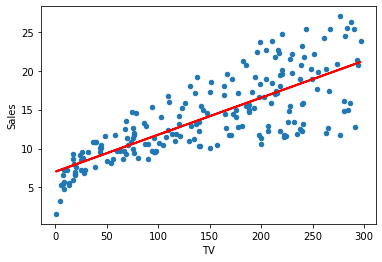

In [31]:
# Сначала выведем истинные данные
data.plot(kind='scatter', x='TV', y='Sales')

# Теперь рисуем нашу линию
plt.plot(x, y_pred, c='red', linewidth=2)

Посчитаем ошибку MSE на обучающей выборке:


In [32]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_pred, y))

10.512652915656757


### Используем все признаки

Простую линейную регрессию с одним признаком можно легко расширить на случай нескольких признаков:
$$y=\beta_0+\beta_1x_1+...+\beta_nx_n$$

А для нашего датасета это будет выглядеть так:
$$Sales=\beta_0+\beta_1*TV+\beta_2*radio+\beta_3*newspaper$$

Давайте опять воспользуемся sklearn, чтобы их оценить:

In [33]:
reg = LinearRegression()

X = data.drop("Sales", axis=1)
y = data["Sales"]

# Обучаем нашу модель
reg.fit(X, y)

# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))

Сдвиг=2.9388893694594085
Коэффициент для TV=0.045764645455397615
Коэффициент для Radio=0.18853001691820456
Коэффициент для Newspaper=-0.0010374930424763272


Вес признака отвечает также, как и в предыдущем случае за значимость этого признака. Для газет он вообще отрицательный. Вычислим ошибку на обучающей выборке.

In [34]:
y_pred = reg.predict(X)

# Ошибка теперь равна:
print(mean_squared_error(y_pred, y))

2.784126314510936


Ошибка уже меньше, чем при одном признаке, однако измерять ошибку на обучающей выборке неправильно. Помимо истинной зависимости между признаками и целевой переменной, туда могут затесаться случайности, лишние данные и прочие факторы. Если не ограничивать каким-то образом модель (об этом мы узнаем позднее), то модель легко подстраивается под эти шумы. Она начинает показывать очень хорошее качество на обучающей выборке, но когда мы попробуем посмотреть качество на других выборках, то там модель будет показывать себя плохо. Это и есть переобучение.

<img src="overfit.png">

Поэтому применим кросс-валидацию:

In [35]:
# Многие выбирают k=5 для начала
k = 5
errors = []

X = data.drop("Sales", axis=1)
y = data["Sales"]

# Размер одной части
fold_size = len(X) // k

# Мб этот код на семинаре написать?
for i in range(k):
    # Берём все значения, кроме выбранной части
    X_train = X[:i * fold_size].append(X[(i + 1) * fold_size:])
    y_train = y[:i * fold_size].append(y[(i + 1) * fold_size:])
    
    # Берём выбранную часть
    X_test = X[i * fold_size:(i + 1) * fold_size]
    y_test = y[i * fold_size:(i + 1) * fold_size]
    
    # На каждой итерации обучаемся отдельно и сохраняем ошибку
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    errors.append(mean_squared_error(y_pred, y_test))
    
# Выводим ошибку на кросс-валидации
print(np.average(errors))

3.07294659710021


In [36]:
# А можно не париться и попросить sklearn всё сделать за нас
from sklearn.model_selection import cross_val_score

# Берём с отрицательным знаком, т.к. обычно туда передаётся не функция потерь, которую надо минимизировать
# А что-то вроде "функции успеха", которую надо максимизировать
errors = -cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
print(np.average(errors))

3.07294659710021


Видно, что ошибка больше, чем тогда на обучающей выборке, поэтому есть показания думать, что это переобучение. Отчего оно обычно происходит? Мы берём слишком много лишних признаков или делаем модель слишком сложной для данной задачи. Для решения этой задачи существует регуляризация.

### Регуляризация

Регуляризация - это искусстенное занижение всех параметров моделей ($\beta_0,\beta_1,...$). Это помогает упростить модель, т.к. низкие значения $\beta_i$ означают, что модель будет выдавать результаты близкие к прямой (или гиперплоскости, если параметров много). А также зануление некоторых коэффициентов может убрать ненужные признаки из обучения. Однако как всё это сделать так, чтобы не убрать нужные признаки?

Посмотрим на функцию потерь, которую мы минимизируем:
$$L(\beta)=\sum_{i=1}^{N}(y^{true}_i-y^{pred}_i)^2$$

Добавим туда слагаемое, которое поможет нам понизить значения наших $\beta_i$:
$$L(\beta)=\sum_{i=1}^{N}(y^{true}_i-y^{pred}_i)^2 + \lambda \sum_{i=1}^m\beta_i^2$$

Действительно, если мы будем понижать нашу функцию потерь $L(\beta)$, то мы будем минимизировать и второе слагаемое, которое и отвечает за абсолютные величины $\beta_i$. Осталось указать, что $\lambda$ это некоторый числовой коэффициент, который позволяет играться между очень сильной и очень слабой регуляризацией. Если он большой, то регуляризация сильная и модель будет более простой, меньше переобучаться, больше недообучаться, и наоброт. 

Забыл добавить, что это была L2-регуляризация.
L1-регуляризация выглядит так:
$$L(\beta)=\sum_{i=1}^{N}(y^{true}_i-y^{pred}_i)^2 + \lambda \sum_{i=1}^m|\beta_i|$$
Она отличается от L2 тем, что она обнуляет некоторые коэффициенты, а L2 пытается всё уменьшать равномерно.

В sklearn L1-регуляризация - это Lasso, а L2-регуляризация - это Ridge. Давайте посмотрим, какое качество они нам дадут на кросс-валидации.

In [37]:
# L1
from sklearn.linear_model import Lasso

reg = Lasso().fit(X, y)

# Посмотрим на коэффициенты модели
# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))
print()

errors = -cross_val_score(Lasso(), X, y, cv=5, scoring='neg_mean_squared_error')
print("Результат={}".format(np.average(errors)))


Сдвиг=3.0402155834803786
Коэффициент для TV=0.045661415380019464
Коэффициент для Radio=0.18346439758868255
Коэффициент для Newspaper=0.0

Результат=3.0414058967513684


Видно, что признак с рекламой в газетах модель захотела полностью убрать из выборки.

In [38]:
# L2
from sklearn.linear_model import Ridge

reg = Ridge().fit(X, y)

# Посмотрим на коэффициенты модели
# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))
print()

errors = -cross_val_score(Ridge(), X, y, cv=5, scoring='neg_mean_squared_error')
print("Результат={}".format(np.average(errors)))

Сдвиг=2.9389674583301524
Коэффициент для TV=0.04576464365801847
Коэффициент для Radio=0.1885250968107854
Коэффициент для Newspaper=-0.0010362939589069462

Результат=3.0729326732984985


reg.coef_


Тут модель полностью не зануляла все признаки, а уменьшила их веса некоторых из них, а некоторых увеличила. Но изменения были столь незначительные, что качество не изменилось.

Как видно, качество не сильно улучшилось. Это всё потому что, мы не подбирали параметр параметр lambda (в моделях он называется alpha), а оставили его равным 1.0. Вот тут нам и приходит на помощь кросс-валидация.

Попробуем сначала Lasso. Давайте сначала поступим по тупому, и будем выбирать параметр lambda на обучающей выборке.

In [39]:
lambdas = np.arange(0.1, 3.0, 0.2)
# Выведем доступные lambda
print("Все лямбды:")
print(lambdas)

# Лямбды и их ошибки на обучающей выборке
lambda_errors = []

# Проходим по всем лямбдам и записываем ошибки на обучающей выборке
for val in lambdas:
    reg = Lasso(alpha=val).fit(X, y)
    y_pred = reg.predict(X)
    # Сохраняем ошибку на обучающей выборке
    lambda_errors.append((val, mean_squared_error(y_pred, y)))
    print(((val, mean_squared_error(y_pred, y))))
    

min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])

# Вычислим ошибку на кросс-валидации
# Лучшая модель
best_reg = Lasso(alpha=min_val)
cv_error = -np.average(cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error'))

print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, cv_error))
 

Все лямбды:
[0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9]
(0.1, 2.7842286851696874)
(0.30000000000000004, 2.784985993046452)
(0.5000000000000001, 2.7857256993570276)
(0.7000000000000001, 2.786835272563889)
(0.9000000000000001, 2.7883147049707757)
(1.1000000000000003, 2.790163996577688)
(1.3000000000000003, 2.7923831473846246)
(1.5000000000000004, 2.7949721573915864)
(1.7000000000000004, 2.797931026598574)
(1.9000000000000004, 2.801259755005587)
(2.1000000000000005, 2.8049583426126237)
(2.3000000000000007, 2.809026789419686)
(2.5000000000000004, 2.813465095426773)
(2.7000000000000006, 2.8182732606338856)
(2.900000000000001, 2.823451285041023)

Оптимальная lambda:
Lambda=0.10, результат=3.07


А теперь сделайте так, чтобы сохранялась ошибка не на обучающей выборке, а на кросс-валдиации (cross_val_score) и минимум выбирался из неё. 

**(0.5 балла) Обязательное задание 4:** нарисуйте график зависимости ошибки на тестовом множестве от lambda. При какой lambda ошибка минимальна?

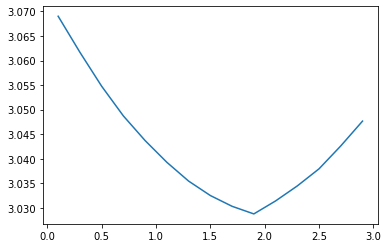

In [40]:
### ваш код здесь
lambdas = np.arange(0.1, 3.0, 0.2)
lambda_errors = []
 

for val in lambdas:
    best_reg = Lasso(alpha=val)
    cv_error = -np.average(cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error'))
    lambda_errors.append(cv_error)
plt.plot(lambdas, lambda_errors)
 
 

**(0.5 балла) Обязательное задание 5:** Сделайте то же самое для L1-регуляризации:

In [41]:
### ваш код здесь
lambdas = np.arange(0.1, 3.0, 0.2)
# Выведем доступные lambda
print("Все лямбды:")
print(lambdas)

# Лямбды и их ошибки на обучающей выборке
lambda_errors = []

# Проходим по всем лямбдам и записываем ошибки на обучающей выборке
for val in lambdas:
    reg = Ridge(alpha=val).fit(X, y)
    y_pred = reg.predict(X)
    # Сохраняем ошибку на обучающей выборке
    lambda_errors.append((val, mean_squared_error(y_pred, y)))
    print(((val, mean_squared_error(y_pred, y))))


min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])

# Вычислим ошибку на кросс-валидации
# Лучшая модель
best_reg = Ridge(alpha=min_val)
cv_error = -np.average(cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error'))

print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, cv_error))


Все лямбды:
[0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9]
(0.1, 2.7841263145573834)
(0.30000000000000004, 2.7841263149289524)
(0.5000000000000001, 2.784126315672079)
(0.7000000000000001, 2.7841263167867503)
(0.9000000000000001, 2.784126318272955)
(1.1000000000000003, 2.784126320130681)
(1.3000000000000003, 2.7841263223599153)
(1.5000000000000004, 2.7841263249606443)
(1.7000000000000004, 2.7841263279328574)
(1.9000000000000004, 2.784126331276542)
(2.1000000000000005, 2.784126334991685)
(2.3000000000000007, 2.784126339078276)
(2.5000000000000004, 2.784126343536301)
(2.7000000000000006, 2.7841263483657475)
(2.900000000000001, 2.784126353566604)

Оптимальная lambda:
Lambda=0.10, результат=3.07


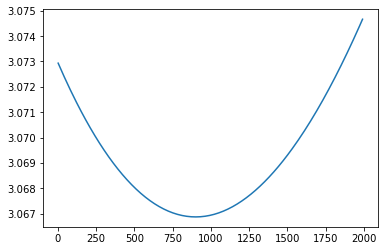

In [42]:
lambdas = np.arange(1, 2000.0, 10)
lambda_errors = []
 

for val in lambdas:
    best_reg = Ridge(alpha=val)
    cv_error = -np.average(cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error'))
    lambda_errors.append(cv_error)

plt.plot(lambdas, lambda_errors)

Если всё было правильно, то данные манипуляции помогут немного улучшить качество вашей модели. Это поднимет вас на несколько мест в соревнованиях, или вашему работодателю даст побольше прибыли.

### Основное домашнее задание (6 баллов + гешефт за улучшения)

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Для домашнего задания вы используете другой датасет.

In [44]:
data = pd.read_csv('diabetes.data.csv', sep='\t')
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


В датасете приводится информация о пациентах и их состоянии при заболевании диабетом. Описание признаков можно прочитать [здесь](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html). Колонка Y - целевая переменная:

In [45]:
target = 'Y'
X = data.drop([target], axis=1)
y = data[target]

X.shape, y.shape

((442, 10), (442,))

Ваша задача - провести то же исследование, что и в датасете в самом начале (Sales ~ TV, Radio, Newspaper). В итоге, нужно получить модель линейной регрессии, качество которой надо вывести с помощью cross_val_score с метрикой MSE (тоже самое в общем).

За каждое достойное улучшение качества на cross_val_score будут доп. баллы. Не забудьте описать, что использовали, что получилось и нет, а также попробуйте понять почему. Побольше гуглите. 

Возможные улучшения:
* Нормализация данных: вычитаем из каждой колонки её среднее и делим на её дисперсию.
* Пробуйте убрать ненужные признаки.
* Можно перемножать некоторые признаки.
* Погуглите что-то вроде "improve linear regression".

В общем, представьте, что вы работаете датасаентистом, получаете 300к долларов, а вам сказали, что нужно как можно лучше уметь предсказывать такие данные.

In [46]:
X

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80
...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85


In [47]:
y

0      151
1       75
2      141
3      206
4      135
      ... 
437    178
438    104
439    132
440    220
441     57
Name: Y, Length: 442, dtype: int64

In [48]:
#Попробуем тривиально на разделить выборку и обучиться на обычной регрессии

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

reg = LinearRegression()

# Обучаем нашу модель
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

# Ошибка теперь равна:
print(mean_squared_error(y_pred, y_test))

errors = -cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')
print(np.average(errors))

2603.6886904459793
2993.0813104693325


best Lambda 0.1
2992.1728906721464
Результат=2992.1728906721464


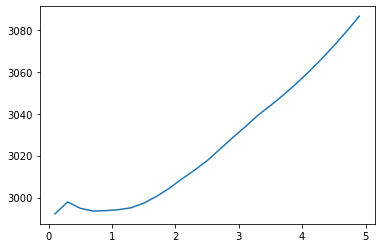

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)
X = pd.DataFrame(data=X)
lambdas = np.arange(0.1, 5.0, 0.2)
lambda_errors = []
miner = 9000
bLambda = 1
for val in lambdas:
    best_reg = Lasso(alpha=val)
    cv_error = -np.average(cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error'))
    lambda_errors.append(cv_error)
    if miner > cv_error:
        miner = cv_error
        bLambda = val
plt.plot(lambdas, lambda_errors)
print('best Lambda', bLambda)
print(miner)

reg = Lasso().fit(X, y)

# Посмотрим на коэффициенты модели
# Коэффициенты
 

errors = -cross_val_score(Lasso(alpha = bLambda), X, y, cv=5, scoring='neg_mean_squared_error')
print("Результат={}".format(np.average(errors)))


best Lambda 0.30000000000000004
2993.002384871007
Результат=2993.002384871007


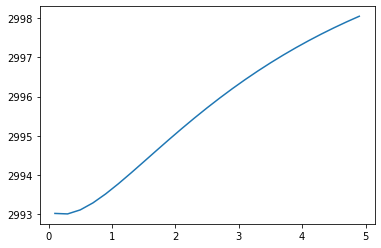

In [50]:
lambdas = np.arange(0.1, 5.0, 0.2)
lambda_errors = []

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)
X = pd.DataFrame(data=X)

miner = 9000
bLambda = 1
for val in lambdas:
    best_reg = Ridge(alpha=val)
    cv_error = -np.average(cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error'))
    lambda_errors.append(cv_error)
    if miner > cv_error:
        miner = cv_error
        bLambda = val
plt.plot(lambdas, lambda_errors)
print('best Lambda', bLambda)
print(miner)
 

errors = -cross_val_score(Ridge(alpha = bLambda), X, y, cv=5, scoring='neg_mean_squared_error')
print("Результат={}".format(np.average(errors)))

In [109]:
data = pd.read_csv('diabetes.data.csv', sep='\t')
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [110]:
data.shape

(442, 11)

In [111]:
data.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [112]:
IQR = 140 - 87
upper_bound = (1.5*IQR) + 140
lower_bound = 87 - (1.5*IQR)
print(upper_bound)
print(lower_bound)

219.5
7.5


In [113]:
# data = data[(data['Y'] >lower_bound) & (data['Y'] < upper_bound)]

In [114]:
target = 'Y'
X = data.drop([target], axis=1)
y = data[target]

X.shape, y.shape


((442, 10), (442,))

In [73]:
data = pd.read_csv('diabetes.data.csv', sep='\t')
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)

X = pd.DataFrame(data=X)
target = 'Y'
X = data.drop([target], axis=1)
y = data[target]

In [74]:

errors = -cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error')
print("Результат={}".format(np.average(errors)))

#Недообучение

Результат=3214.470673200231


In [85]:
data = pd.read_csv('diabetes.data.csv', sep='\t')
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [86]:
#maybe log?
data

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [87]:
target = 'Y'
X = data.drop([target], axis=1)
y = data[target]


In [88]:
X

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80
...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85


In [89]:
y

0      151
1       75
2      141
3      206
4      135
      ... 
437    178
438    104
439    132
440    220
441     57
Name: Y, Length: 442, dtype: int64

In [90]:
for i in X.columns:
    X[i] = X[i].apply(lambda x: np.log(x))

best Lambda 0.17999999999999997
3037.5772357157607


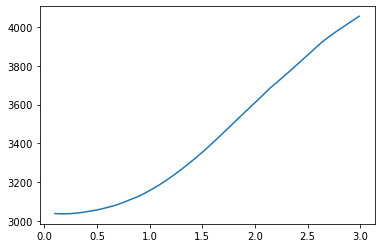

In [91]:
 
lambdas = np.arange(0.1, 3, 0.01)
lambda_errors = []
miner = 9000
bLambda = 1
for val in lambdas:
    best_reg = Lasso(alpha=val)
    cv_error = -np.average(cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error'))
    lambda_errors.append(cv_error)
    if miner > cv_error:
        miner = cv_error
        bLambda = val
plt.plot(lambdas, lambda_errors)
print('best Lambda', bLambda)
print(miner)

In [180]:
data = pd.read_csv('diabetes.data.csv', sep='\t')
target = 'Y'
X = data.drop([target], axis=1)
y = data[target]
y.shape

(442,)

In [155]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([('poly', PolynomialFeatures(2)), ('reg', LinearRegression())])

# pipe = Pipeline([('reg', LinearRegression())])


cv_error = -np.average(cross_val_score(pipe, X, y, cv=5, scoring='neg_mean_squared_error'))
print(cv_error)
#MSE оч большая

14085.0608510027


In [182]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(353, 10)
(89, 10)
(353,)
(89,)


In [192]:

pipe = Pipeline([('poly', PolynomialFeatures(2)), ('reg', LinearRegression())])

pipe.fit(X_train, Y_train)
y_trainPred = pipe.predict(X_train)
y_pred = pipe.predict(X_test)
print((mean_squared_error(Y_test, y_pred)))
print((mean_squared_error(Y_train, y_trainPred)))

# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

19176.59119526858
10382.907023909494


In [130]:
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


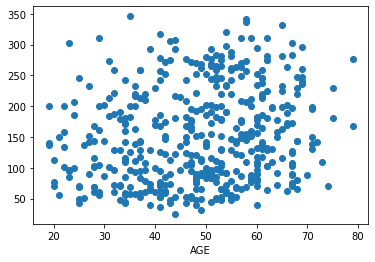

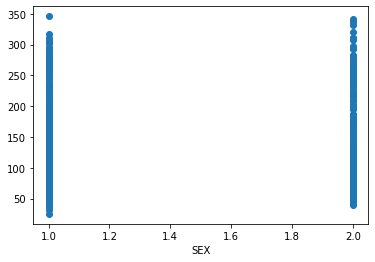

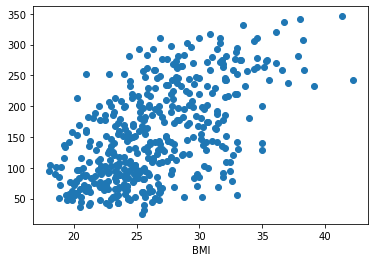

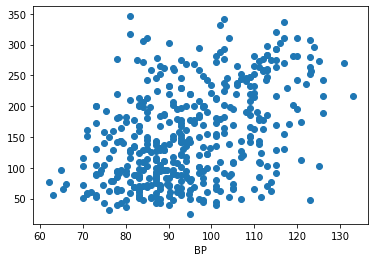

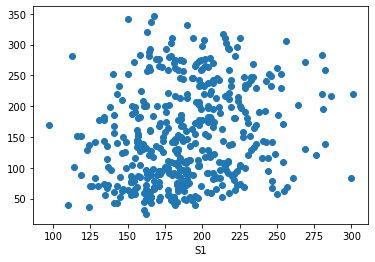

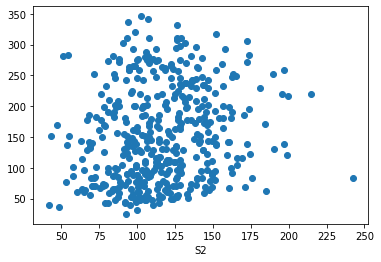

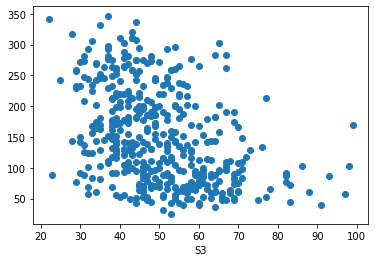

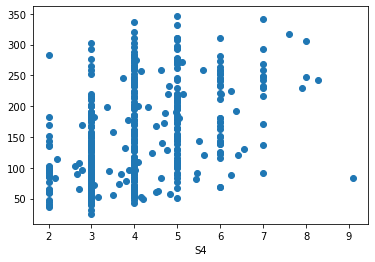

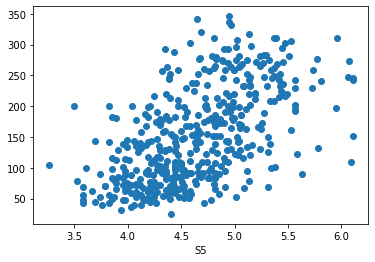

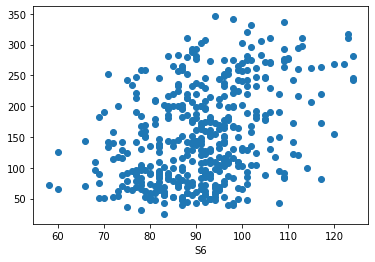

In [131]:
j = 1

for i in X.columns:
    plt.figure(j)
    plt.scatter(X[i],y)
    plt.xlabel(i)
    j+=1

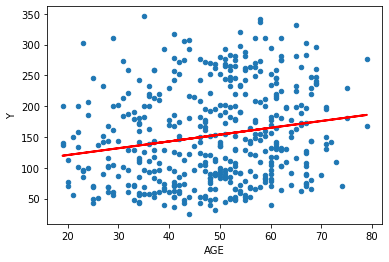

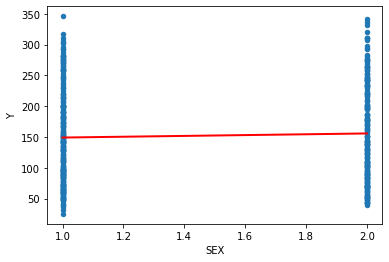

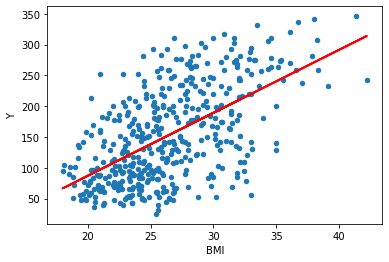

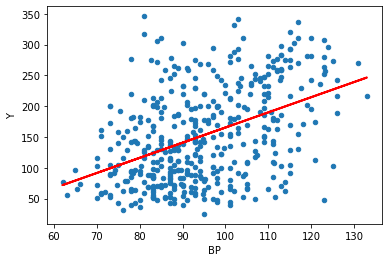

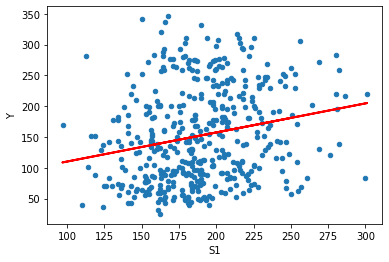

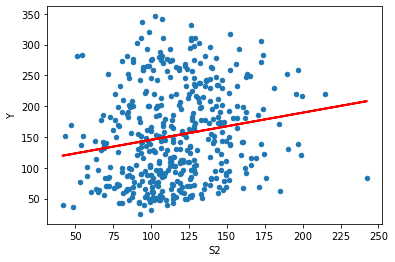

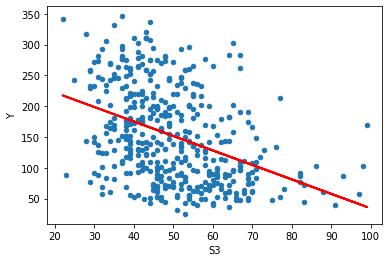

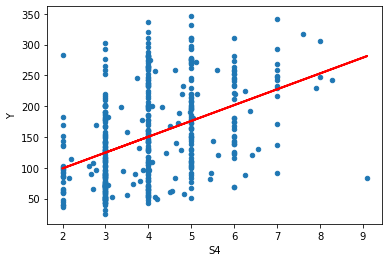

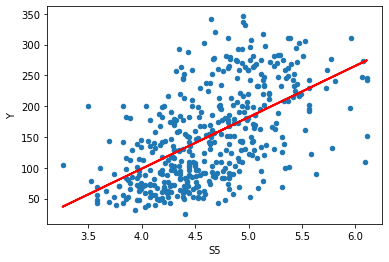

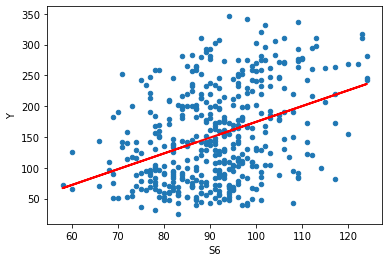

In [144]:
reg = LinearRegression()
for i in X.columns:
    reg.fit(X[i].values.reshape(-1, 1) ,y)
    y_pred = reg.predict(X[i].values.reshape(-1, 1) )
    
    
    data.plot(kind='scatter', x=i, y='Y')

    # Теперь рисуем нашу линию
    plt.plot(X[i], y_pred, c='red', linewidth=2)

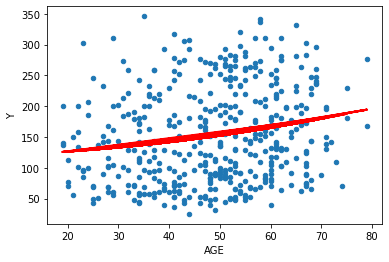

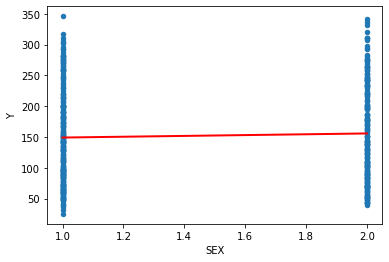

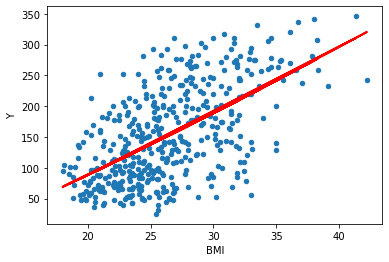

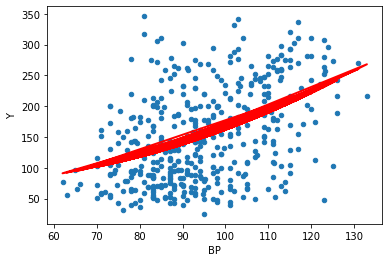

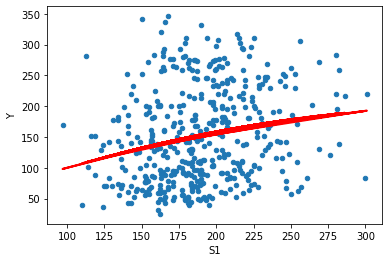

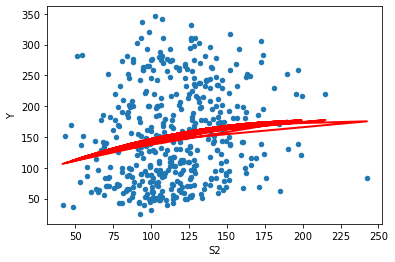

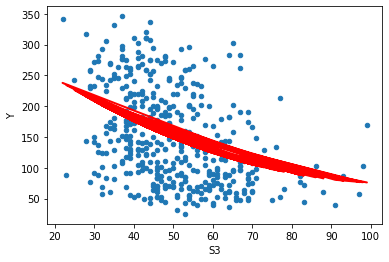

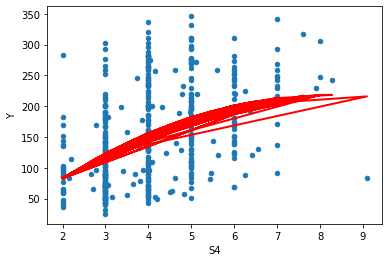

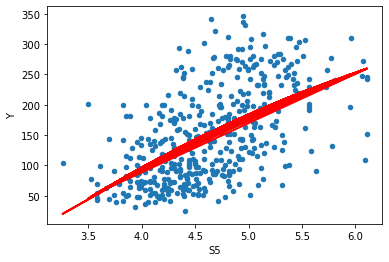

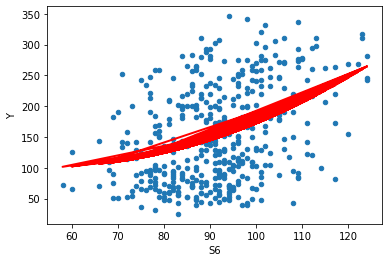

In [145]:
pipe = Pipeline([('poly', PolynomialFeatures(2)), ('reg', LinearRegression())])
for i in X.columns:
    
    pipe.fit(X[i].values.reshape(-1, 1) ,y)
    y_pred = pipe.predict(X[i].values.reshape(-1, 1) )
    
    
    data.plot(kind='scatter', x=i, y='Y')

    # Теперь рисуем нашу линию
    plt.plot(X[i], y_pred, c='red', linewidth=2)

In [222]:
data = pd.read_csv('diabetes.data.csv', sep='\t')
 

target = 'Y'
X = data.drop([target], axis=1)
y = data[target]



pipe = Pipeline([('poly', PolynomialFeatures(2)), ('reg', Lasso())])
 

cv_error = -np.average(cross_val_score(pipe, X, y, cv=5, scoring='neg_mean_squared_error'))
 
print(cv_error)
 

3216.432514066625


/home/pavel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 453263.3049632429, tolerance: 215.31875694050996
  positive)
/home/pavel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457562.2353834008, tolerance: 204.3787569405099
  positive)
/home/pavel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 433972.9212915453, tolerance: 207.00184971751415
  positive)
/home/pavel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the n

In [229]:
data = pd.read_csv('diabetes.data.csv', sep='\t')
 

target = 'Y'
X = data.drop([target], axis=1)
y = data[target]

best Lambda 0.1
2993.802534865842


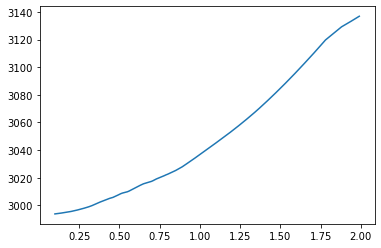

In [230]:
 
lambdas = np.arange(0.1, 2, 0.01)
lambda_errors = []
miner = 9000
bLambda = 1
for val in lambdas:
    best_reg = Lasso(alpha=val)
    pipe = Pipeline([('scaler', StandardScaler() ),('poly', PolynomialFeatures(2)), ('reg', best_reg)])
    cv_error = -np.average(cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error'))
    lambda_errors.append(cv_error)
    if miner > cv_error:
        miner = cv_error
        bLambda = val
plt.plot(lambdas, lambda_errors)
print('best Lambda', bLambda)
print(miner)

best Lambda 0.1
2993.0675532980135


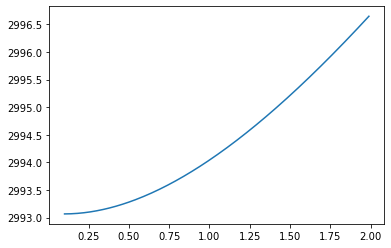

In [231]:
lambdas = np.arange(0.1, 2, 0.01)
lambda_errors = []
miner = 9000
bLambda = 1
for val in lambdas:
    best_reg = Ridge(alpha=val)
    pipe = Pipeline([('scaler', StandardScaler() ),('poly', PolynomialFeatures(2)), ('reg', best_reg)])
    cv_error = -np.average(cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error'))
    lambda_errors.append(cv_error)
    if miner > cv_error:
        miner = cv_error
        bLambda = val
plt.plot(lambdas, lambda_errors)
print('best Lambda', bLambda)
print(miner)